# Jun gene count

## Dependencies

In [24]:
import numpy as np
import cProfile
import pstats
import time
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [3]:
seq = open('jun.txt','r').read()
print(seq)

GACATCATGGGCTATTTTTAGGGGTTGACTGGTAGCAGATAAGTGTTGAGCTCGGGCTGGATAAGGGCTCAGAGTTGCACTGAGTGTGGCTGAAGCAGCGAGGCGGGAGTGGAGGTGCGCGGAGTCAGGCAGACAGACAGACACAGCCAGCCAGCCAGGTCGGCAGTATAGTCCGAACTGCAAATCTTATTTTCTTTTCACCTTCTCTCTAACTGCCCAGAGCTAGCGCCTGTGGCTCCCGGGCTGGTGTTTCGGGAGTGTCCAGAGAGCCTGGTCTCCAGCCGCCCCCGGGAGGAGAGCCCTGCTGCCCAGGCGCTGTTGACAGCGGCGGAAAGCAGCGGTACCCACGCGCCCGCCGGGGGAAGTCGGCGAGCGGCTGCAGCAGCAAAGAACTTTCCCGGCTGGGAGGACCGGAGACAAGTGGCAGAGTCCCGGAGCCAACTTTTGCAAGCCTTTCCTGCGTCTTAGGCTTCTCCACGGCGGTAAAGACCAGAAGGCGGCGGAGAGCCACGCAAGAGAAGAAGGACGTGCGCTCAGCTTCGCTCGCACCGGTTGTTGAACTTGGGCGAGCGCGAGCCGCGGCTGCCGGGCGCCCCCTCCCCCTAGCAGCGGAGGAGGGGACAAGTCGTCGGAGTCCGGGCGGCCAAGACCCGCCGCCGGCCGGCCACTGCAGGGTCCGCACTGATCCGCTCCGCGGGGAGAGCCGCTGCTCTGGGAAGTGAGTTCGCCTGCGGACTCCGAGGAACCGCTGCGCACGAAGAGCGCTCAGTGAGTGACCGCGACTTTTCAAAGCCGGGTAGCGCGCGCGAGTCGACAAGTAAGAGTGCGGGAGGCATCTTAATTAACCCTGCGCTCCCTGGAGCGAGCTGGTGAGGAGGGCGCAGCGGGGACGACAGCCAGCGGGTGCGTGCGCTCTTAGAGAAACTTTCCCTGTCAAAGGCTCCGGGGGGCGCGGGTGTCCCCCGCTTGCCACAGCCCTGTTGCGGCCCCGAAACTTGTG

## Split sequence

In [4]:
def split_gene(gene_seq, n=3):
    ## split a string containing nucleotids into an array of n-nucleotides per cell
    #if np.mod(len(gene_seq), n) != 0:
        #print('WARNING ! This sequence has a length of ' + str(len(gene_seq)) + ' nucleotides wich is not a multiple of ' + str(n) + '. The last ' + str(np.mod(len(gene_seq),n)) + ' nucleotide(s) has then been ignored.')#, file=sys.stderr)
    return [gene_seq[i-(n-1):i+1] for i in range(n-1,len(gene_seq)//n * n,n)]

test_seq = 'ATCGATG'
print('Test by splitting the sequence : ' + test_seq + ' TriNucleotides')
split_gene(test_seq)

Test by splitting the sequence : ATCGATG TriNucleotides


['ATC', 'GAT']

## List combinations

In [40]:
def list_single_combination(n):
    nucl_list = 'A T C G'.split()
    ## list all different n-combinations of the elements in nucl_list
    if n == 1:
        return nucl_list
    else:
        sub = list_single_combination(n - 1)
        return [n + s for n in nucl_list for s in sub]
    
print('Test by searching all possible BiNucleotide :')
print(list_single_combination(2))

Test by searching all possible BiNucleotide :
['AA', 'AT', 'AC', 'AG', 'TA', 'TT', 'TC', 'TG', 'CA', 'CT', 'CC', 'CG', 'GA', 'GT', 'GC', 'GG']


## Count frequency

In [47]:
def count_freq(array, combin_list):
    ## count the number of occurrencies of each combination in combin_list that appears in array
    freq = {}
    for c in combin_list:
        freq[c] = array.count(c)
    return freq

print('Test by counting nucleotides frequency in ' + test_seq)
print(count_freq(split_gene(test_seq,1), list_single_combination(1)))

Test by counting nucleotides frequency in ATCGATG
{'T': 2, 'G': 2, 'C': 1, 'A': 2}


## Count frequencies

In [48]:
for n in range(1,4):
    print(count_freq(split_gene(seq, n), list_single_combination(n)))
    print('\n\n')

{'T': 257, 'G': 269, 'C': 233, 'A': 241}



{'GA': 28, 'GT': 33, 'AC': 38, 'CT': 25, 'GG': 33, 'TC': 23, 'CG': 39, 'TG': 35, 'AG': 34, 'CC': 23, 'GC': 34, 'AA': 29, 'TA': 31, 'CA': 28, 'AT': 24, 'TT': 43}



{'CAG': 5, 'CCG': 4, 'AAC': 2, 'AGG': 5, 'TCA': 7, 'GCC': 8, 'CGA': 6, 'ATC': 4, 'AAG': 6, 'CGT': 4, 'CGG': 5, 'TTA': 7, 'ACA': 1, 'ACG': 8, 'TGG': 5, 'TAT': 7, 'GAT': 7, 'AGC': 4, 'GGG': 8, 'TAC': 7, 'CAC': 7, 'GCT': 6, 'TAG': 8, 'TTG': 9, 'TTC': 5, 'ACC': 5, 'GCA': 3, 'CTG': 6, 'GAC': 5, 'TGT': 5, 'TGA': 3, 'CCC': 2, 'GCG': 8, 'TAA': 2, 'CTA': 2, 'ATG': 2, 'CGC': 2, 'GAA': 4, 'ACT': 7, 'TCG': 5, 'GAG': 6, 'CCA': 6, 'AGA': 6, 'GTA': 8, 'TTT': 6, 'GGA': 5, 'TCC': 5, 'AAT': 10, 'TGC': 8, 'GTT': 4, 'CAT': 2, 'ATA': 4, 'CTT': 5, 'TCT': 0, 'CTC': 4, 'GGT': 3, 'CAA': 1, 'GTC': 8, 'AGT': 5, 'AAA': 8, 'GGC': 5, 'CCT': 8, 'ATT': 4, 'GTG': 6}





## Generate sequence

In [8]:
def generate_seq(N):
    d={};d[0]='A';d[1]='T';d[2]='C';d[3]='G'
    return ''.join([d[np.random.randint(4)] for _ in range(N)])

In [13]:
generate_seq(20)

'TCATGTATAGGAGCTATAGT'

# Profiling

In [49]:
seq = generate_seq(10**7)

def count_freq_profiled(n = 3):
    print('Profiling for n=' + str(n))
    def func():
        count_freq(split_gene(seq, n), list_single_combination(n))
    fpath ='counting.prof'
    prof = cProfile.Profile()
    ret = prof.runcall(func)
    prof.dump_stats(fpath)
    print_profile(fpath)

def print_profile(f, n='', sort='time'):
    p = pstats.Stats(f)
    p.sort_stats(sort)
    p.print_stats(n)

In [50]:
for i in range(1,4):
    count_freq_profiled(i)

Profiling for n=1
Mon Apr 24 11:12:10 2017    counting.prof

         12 function calls in 3.042 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    2.318    2.318    2.318    2.318 <ipython-input-4-0274a29caa49>:5(<listcomp>)
        4    0.703    0.176    0.703    0.176 {method 'count' of 'list' objects}
        1    0.020    0.020    3.042    3.042 <ipython-input-49-1c9365dae148>:5(func)
        1    0.000    0.000    0.703    0.703 <ipython-input-47-ee69316a9203>:1(count_freq)
        1    0.000    0.000    0.000    0.000 <ipython-input-40-50df4fd2fc85>:1(list_single_combination)
        1    0.000    0.000    2.318    2.318 <ipython-input-4-0274a29caa49>:1(split_gene)
        1    0.000    0.000    0.000    0.000 {method 'split' of 'str' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        1    0.000    0.000    0.000    0.000 {built-in method builtins

## Estimate computation time

Slope for 1-nucleotides = 3.32090076262e-07
Slope for 2-nucleotides = 3.24018621896e-07
Slope for 3-nucleotides = 6.23406533767e-07


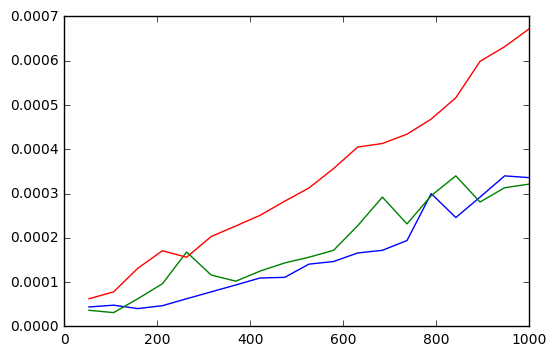

In [51]:
N = [int(k) for k in np.linspace(10**0,10**3,20)][1::]
t = [0]*len(N)

for n in range(1,4):
    for i in range(len(N)):
        seq = generate_seq(N[i])
        start = time.time()
        it = 1000
        for _ in range(it):
            count_freq(split_gene(seq, n), list_single_combination(n))
        t[i] = (time.time() - start) / it
    plt.plot(N, t)
    slope, intercept, r_value, p_value, std_err = stats.linregress(N,t)
    print('Slope for ' + str(n) + '-nucleotides = ' + str(slope))

In [52]:
print('Prediction based on triNucleotides (slowest) : ' + str(10**9*slope) + 'µs/nucl (confidence = ' + str(100*r_value) + '%)\n')
proc_time = slope * 3.5 * 10**9
print('Human genome processing time : ' + str(int(proc_time//3600)) + 'h ' + str(int(proc_time//60)) + 'min ' + str(proc_time%60) + 's')

Prediction based on triNucleotides (slowest) : 623.406533767µs/nucl (confidence = 99.1389812349%)

Human genome processing time : 0h 36min 21.9228681839s
